In [1]:
# %%
# 🤖 Etapa 3: Regressão Linear

# ============================
# 📦 Imports
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

import statsmodels.api as sm

# Configurações visuais
sns.set(style="whitegrid", palette="dark")
pd.set_option("display.max_columns", None)


In [2]:
# %%
# 1. Carregamento dos Dados Processados
df = pd.read_csv("../data/processed/dataset_clean.csv")
X = df.drop(["student_id", "final_grade"], axis=1)
y = df["final_grade"]

# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Imputação com mediana para evitar erro de NaN
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)


In [3]:
# %%
# Função para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [4]:
# %%
# Treinar Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predições
y_pred = modelo.predict(X_val)

# Métricas
resultados = calcular_metricas(y_val, y_pred)
print("Resultados Regressão Linear:", resultados)


Resultados Regressão Linear: {'MAE': 3.9265548753617123, 'MSE': 32.38809619315991, 'RMSE': np.float64(5.691054049397168), 'R²': 0.4346032724786979}


In [5]:
# %%
# Validação cruzada
X_full = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scores = cross_val_score(modelo, X_full, y, cv=5, scoring="neg_mean_absolute_error")

print("Cross-Validation MAE Médio:", -scores.mean())
print("Desvio:", scores.std())


Cross-Validation MAE Médio: 3.595866269391248
Desvio: 0.07715558544717473


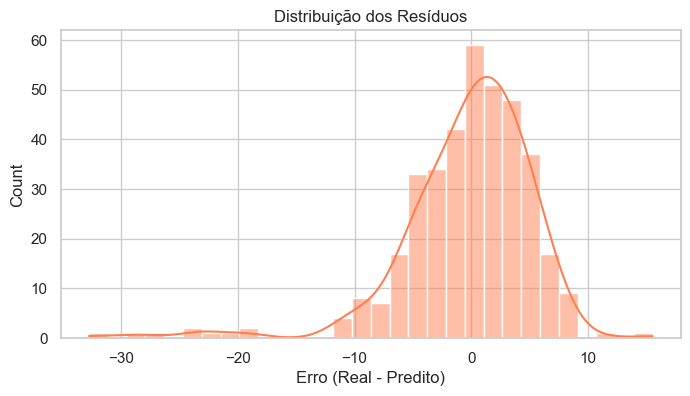

In [6]:
# %%
# Análise de resíduos
residuos = y_val - y_pred

plt.figure(figsize=(8,4))
sns.histplot(residuos, bins=30, kde=True, color="coral")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (Real - Predito)")
plt.show()



In [7]:
# %%
# Salvar dataset limpo no final da Etapa 3
df.to_csv("../data/processed/dataset_clean.csv", index=False)
print("✅ Dataset limpo salvo em: data/processed/dataset_clean.csv")


✅ Dataset limpo salvo em: data/processed/dataset_clean.csv


# # Conclusões
# 
# - O modelo utilizado foi **Regressão Linear**.
# - As métricas (MAE, RMSE, R²) mostram o desempenho do modelo.
# - A análise de resíduos indica se os erros estão distribuídos de forma simétrica e centrada em zero.
# - Este modelo será usado como base para tuning e deploy na Etapa 4.
